In [1]:
#importing required libraries
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", 20000)
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#reading the dataset
data = pd.read_csv("train.csv", skipinitialspace = True)

In [3]:
data.shape

(20972, 9)

In [4]:
data.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,"Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm that can be used with different binary classifiers in a diagnostic\nmanner, i.e. without information on condition presence. Reconstruction is posed\nas a Maximum-A-Posteriori problem with a prior model whose parameters are\nestimated from training data in a classifier-specific fashion. Experimental\nevaluation is performed on synthetically generated data and data from the\nAlzheimer's Disease Neuroimaging Initiative (ADNI) database. Results on\nsynthetic data demonstrate that using RSM yields higher detection accuracy\ncompared to using models directly or with bootstrap averaging. Analyses on the\nADNI dataset show that RSM can also improve correlation between\nsubject-specific detections in cortical thickness data and non-imaging markers\nof Alzheimer's Disease (AD), such as the Mini Mental State Examination Score\nand Cerebrospinal Fluid amyloid-$\beta$ levels. Further reliability studies on\nthe longitudinal ADNI dataset show improvement on detection reliability when\nRSM is used.\n",1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,"Rotation invariance and translation invariance have great values in image\nrecognition tasks. In this paper, we bring a new architecture in convolutional\nneural network (CNN) named cyclic convolutional layer to achieve rotation\ninvariance in 2-D symbol recognition. We can also get the position and\norientation of the 2-D symbol by the network to achieve detection purpose for\nmultiple non-overlap target. Last but not least, this architecture can achieve\none-shot learning in some cases using those invariance.\n",1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels for polyharmonic functions,"We introduce and develop the notion of spherical polyharmonics, which are a\nnatural generalisation of spherical harmonics. In particular we study the\ntheory of zonal polyharmonics, which allows us, analogously to zonal harmonics,\nto construct Poisson kernels for polyharmonic functions on the union of rotated\nballs. We find the representation of Poisson kernels and zonal polyharmonics in\nterms of the Gegenbauer polynomials. We show the connection between the\nclassical Poisson kernel for harmonic functions on the ball, Poisson kernels\nfor polyharmonic functions on the union of rotated balls, and the Cauchy-Hua\nkernel for holomorphic functions on the Lie ball.\n",0,0,1,0,0,0
3,4,A finite element approximation for the stochastic Maxwell--Landau--Lifshitz--Gilbert system,"The stochastic Landau--Lifshitz--Gilbert (LLG) equation coupled with the\nMaxwell equations (the so called stochastic MLLG system) describes the creation\nof domain walls and vortices (fundamental objects for the novel nanostructured\nmagnetic memories). We first reformulate the stochastic LLG equation into an\nequation with time-differentiable solutions. We then propose a convergent\n$\theta$-linear scheme to approximate the solutions of the reformulate

In [5]:
data.dtypes

ID                       int64
TITLE                   object
ABSTRACT                object
Computer Science         int64
Physics                  int64
Mathematics              int64
Statistics               int64
Quantitative Biology     int64
Quantitative Finance     int64
dtype: object

In [6]:
#checking the missing values
data.isnull().sum()

ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64

In [7]:
data = data.drop(['ID'],axis=1)

In [8]:
# make a dictionary of contractions
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [10]:
import warnings
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
warnings.filterwarnings("ignore")
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
lemmatizer = WordNetLemmatizer()
import re
def Cleaner2(text):
    newString=re.sub(r'@[A-Za-z0-9]+','',text)                     #removing user mentions
    newString=re.sub("#","",newString)                             #removing hashtag symbol
    newString= ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")]) #contraction mapping
    newString= re.sub(r'http\S+', '', newString)                   #removing links
    newString= re.sub(r"'s\b","",newString)                        #removing 's
    letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only letters
    lower_case = letters_only.lower()                              #converting everything to lowercase
    tokens = [w for w in lower_case.split() if not w in stop_words]#stopwords removal
    newString=''
    for i in tokens:                                                 
        newString=newString+lemmatizer.lemmatize(i)+' '            #converting words to lemma                               
    return newString.strip()                               

In [15]:
Cleaned_2 = []
for i in data.ABSTRACT :
  Cleaned_2.append(Cleaner2(i))
print(Cleaned_2[:5])   #print top 5 records

['predictive model allow subject specific inference analyzing disease related alteration neuroimaging data given subject data inference made two level global e identifiying condition presence subject local e detecting condition effect individual measurement extracted subject data global inference widely used local inference used form subject specific effect map rarely used existing model often yield noisy detection composed dispersed isolated island article propose reconstruction method named rsm improve subject specific detection predictive modeling approach particular binary classifier rsm specifically aim reduce noise due sampling error associated using finite sample example train classifier proposed method wrapper type algorithm used different binary classifier diagnostic manner e without information condition presence reconstruction posed maximum posteriori problem prior model whose parameter estimated training data classifier specific fashion experimental evaluation performed syn

In [16]:
data['Cleaned_2'] = Cleaned_2
data['Cleaned_2'].isnull().sum()

0

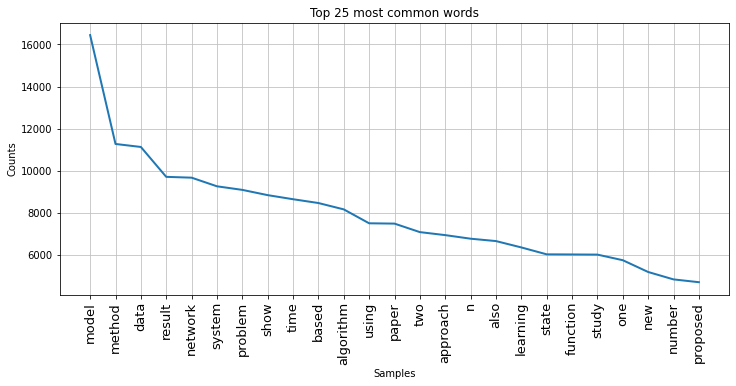

In [17]:
all_words = []
for line in list(data['Cleaned_2']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)   

# **Word Embeddings**

In [ ]:
# download and extract word2vec embeddings 
! wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
! gunzip GoogleNews-vectors-negative300.bin.gz

--2020-08-22 11:11:29--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.132.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.132.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

bin.gz               10%[=>                  ] 170.53M  15.4MB/s    eta 1m 42s 

In [22]:
from gensim.models import KeyedVectors

# path of the downloaded model
filename = 'GoogleNews-vectors-negative300.bin'

# load into gensim
w2vec = KeyedVectors.load_word2vec_format(filename, binary=True)

In [23]:
# function to get vector representation of a abstract
def word_vector(tokens):
    vec = np.zeros((1,300))
    count = 0.
    for word in tokens:
        try:
            vec += w2vec.wv.word_vec(word)
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [24]:
data['Cleaned_2'].dtype

dtype('O')

In [25]:
# empty array of shape (no. of tweets X 300) to store word2vec features
wordvec_arrays = np.zeros((len(data), 300))

for i,j in enumerate(data['Cleaned_2']):
  wordvec_arrays[i,:] = word_vector(j.split())

In [27]:
wordvec_arrays.shape

(20972, 300)

In [28]:
df = pd.read_csv('/content/train.csv', skipinitialspace = True)
df.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [29]:
y = df.drop(['ID', 'TITLE', 'ABSTRACT'], axis = 1)

In [34]:
from sklearn.model_selection import train_test_split
X_train_wv, X_test_wv, y_train_wv, y_test_wv = train_test_split(wordvec_arrays, y, test_size=0.2, random_state=42)

In [35]:
X_train_wv

array([[ 0.00132899, -0.02433235,  0.03978016, ..., -0.02922136,
        -0.01165985,  0.02029238],
       [-0.05741113, -0.00986363,  0.05613448, ..., -0.03554032,
        -0.12743247,  0.06197438],
       [-0.01683482,  0.01840829, -0.00734839, ..., -0.0485066 ,
        -0.00034706,  0.0075021 ],
       ...,
       [-0.0336958 ,  0.00425177, -0.01917079, ..., -0.0073341 ,
         0.02533245,  0.02229758],
       [ 0.0419245 , -0.04881449,  0.00790097, ..., -0.08076721,
        -0.03065239,  0.03851903],
       [ 0.03230742, -0.03799153,  0.03884289, ..., -0.03346067,
        -0.02738988,  0.01171768]])

logistic regression

In [41]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

WE = OneVsRestClassifier(LogisticRegression()).fit(X_train_wv, y_train_wv)

pred_WE = WE.predict(X_test_wv)
score = f1_score(pred_WE, y_test_wv, average = 'micro')
score

0.7542087542087542

# **predictions of test_data using logreg on word2vec**

In [42]:
test = pd.read_csv('test.csv')

In [43]:
test_Cleaned_2 = []
for i in test.ABSTRACT :
  test_Cleaned_2.append(Cleaner2(i))
print(Cleaned_2[:5])   #print top 5 records

['predictive model allow subject specific inference analyzing disease related alteration neuroimaging data given subject data inference made two level global e identifiying condition presence subject local e detecting condition effect individual measurement extracted subject data global inference widely used local inference used form subject specific effect map rarely used existing model often yield noisy detection composed dispersed isolated island article propose reconstruction method named rsm improve subject specific detection predictive modeling approach particular binary classifier rsm specifically aim reduce noise due sampling error associated using finite sample example train classifier proposed method wrapper type algorithm used different binary classifier diagnostic manner e without information condition presence reconstruction posed maximum posteriori problem prior model whose parameter estimated training data classifier specific fashion experimental evaluation performed syn

In [45]:
test['Cleaned_test_abstract'] = test_Cleaned_2

In [46]:
test['Cleaned_test_abstract'].shape

(8989,)

In [47]:
# empty array of shape (no. of tweets X 300) to store word2vec features
test_wordvec_arrays = np.zeros((len(test), 300))

for i,j in enumerate(test['Cleaned_test_abstract']):
 test_wordvec_arrays[i,:] = word_vector(j.split())

In [48]:
test_wordvec_arrays.shape

(8989, 300)

In [49]:
test_WE = WE.predict(test_wordvec_arrays)

In [51]:
pred_test_WE = pd.DataFrame(test_WE)
pred_test_WE.columns = ['Computer Science',	'Physics',	'Mathematics',	'Statistics',	'Quantitative Biology',	'Quantitative Finance']
pred_test_WE.head()


,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,1,0,0,1,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [52]:
pred_test_WE.shape

(8989, 6)

In [53]:
submission_csv = pd.concat([test['ID'], pred_test_WE],axis = 1)
submission_csv.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,1,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [54]:
submission_csv.shape

(8989, 7)

In [55]:
test.shape

(8989, 4)

In [56]:
submission_csv.to_csv('LR_WE_ABSTRACT.csv', index = False)